In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

Drive not mounted, so nothing to flush and unmount.
All changes made in this colab session should now be visible in Drive.


In [ ]:
# Add additional Python packages that we will be using in class
!apt install graphviz build-essential checkinstall imagemagick
# Base Python packages to run example Jupyter Notebooks
!pip install watermark pyprind mlxtend
# Python packages to visualize Decision Tree Classifiers
!pip install pydotplus graphviz pyparsing
# Python packages for Natrual Language Processing
!pip install nltk
# Python packages for Flask-based web applications
!pip install flask wtforms
# Python packages for TensorFlow
!pip install tensorflow tensorflow-datasets

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  file fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagic-mgc libmagic1 libmagickcore-6.q16-3
  libmagickcore-6.q16-3-extra libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7
  netpbm poppler-data
Suggested packages:
  gettext fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr
  | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray
  radiance sane-utils texlive-base-bin transfig ufraw-batc

In [1]:
##### TODO CHANGE THIS TO THE PATH IN GOOGLE DRIVE WHERE YOU COPIED THE ch03 FOLDER #####
google_drive_root='/Machine Learning/Project02'

In [2]:
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'

In [3]:
# Read more here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=D78AM1fFt2ty
from google.colab import drive
drive.mount(google_drive_mount_location)

Mounted at /content/drive


In [5]:
import os
os.chdir(google_file_prefix)
print(google_file_prefix)

/content/drive/My Drive//Machine Learning/Project02/


# Experiment Objective

The dataset is collected from the UCI Machine Learning Repository called Sentiment Labelled Sentences Data Set. The UCI Machine Learning Repository is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms. The archive was created as an ftp archive in 1987 by David Aha and fellow graduate students at UC Irvine. Since that time, it has been widely used by students, educators, and researchers all over the world as a primary source of machine learning data sets. The dataset, Sentiment Labelled Sentences Data Set, has a colloection of reviews from amazon.com, IMDB and yelp.com. This dataset is a multi-domain review dataset. Using this dataset and using SGDClassifier machine learning module, training the dataset so that it can predict whether the given new review or statement is postive or negative review. Also storing the new review in database using SQLite for the machine is trained further to make more accurate predicition. The user can input the reviews using website created from python anywhere using Flask, Jinja2 and WTForms web application. 

# Data Collection

In [ ]:
import os
import sys
import tarfile
import time
import urllib.request


source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip'
target = 'sentiment%20labelled%20sentences.zip'


def reporthook(count, block_size, total_size):
    global start_time
    if count == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    progress_size = int(count * block_size)
    speed = progress_size / (1024.**2 * duration)
    percent = count * block_size * 100. / total_size

    sys.stdout.write("\r%d%% | %d MB | %.2f MB/s | %d sec elapsed" %
                    (percent, progress_size / (1024.**2), speed, duration))
    sys.stdout.flush()


if not os.path.isdir('sentiment%20labelled%20sentences') and not os.path.isfile('sentiment%20labelled%20sentences.zip'):
    urllib.request.urlretrieve(source, target, reporthook)

107% | 0 MB | 2.15 MB/s | 0 sec elapsed

The dataset is extracted from UCI Machine Learning Respositary using URL and downloading the dataset in zip. The dataset consists of amazon.com, IMDB and yelp.com review in separate txt files.

In [ ]:
from zipfile import ZipFile

if not os.path.isdir('sentiment%20labelled%20sentences.zip'):

    with ZipFile(target, 'r') as tar:
        tar.extractall()

Using the above the code, we are extracting the dataset from the zip file. A new folder is created where the three dataset are stored as a txt files.

# Data Preprocessing

In [ ]:
import pandas as pd

amazon = pd.read_csv("./sentiment labelled sentences/amazon_cells_labelled.txt", delimiter='\t',header=None)
amazon.columns = ['comments','review']
imdb = pd.read_csv("./sentiment labelled sentences/imdb_labelled.txt", delimiter='\t',header=None)
imdb.columns = ['comments','review']
yelp = pd.read_csv("./sentiment labelled sentences/yelp_labelled.txt", delimiter='\t',header=None)
yelp.columns = ['comments','review']

Using the above code, we code reading the txt files using pandas into three different dataframes. Since the dataset reviews are txt file, we need to use a delimiter to separate the reviews and the ratings. Here 0 is negative review and 1 is positive review.

In [ ]:
amazon.head()

,comments,review
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Using the above code displaying the amazon.com comments and review values.

In [ ]:
imdb.head()

,comments,review
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


Using the above code displaying the IMDB comments and review values.

In [ ]:
yelp.head()

,comments,review
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Using the above code displaying the yelp.com comments and review values.

In [ ]:
df = pd.concat([amazon, imdb, yelp])
df.head()

,comments,review
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Using the above code, we are collecting the three dataframe into a single large dataframe.

In [ ]:
df = df.sample(frac=1)

The above code is used to shuffle the dataframe. Since the dataframe will have amazon.com reviews first following by IMDB and then followed by yelp.com. We need to shuffle the dataframe so that the machine learning can be more accurate. 

In [ ]:
df.to_csv('movie_data.csv', index=False, encoding='utf-8')

Storing the dataframe as csv file.

In [ ]:
df.isnull().sum()

comments    0
review      0
dtype: int64

Checking for any null values in the dataframe. This dataframe as no null values present it. If in case, null values were present, we would have dropped those rows.

In [ ]:
df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head()

,comments,review
0,I had a seriously solid breakfast here.,1
1,"Very good food, great atmosphere.1",1
2,Bad Quality.,0
3,I bought this battery with a coupon from Amazo...,1
4,We also ordered the spinach and avocado salad;...,0


We are reading the csv file.

In [ ]:
df.shape

(2748, 2)

We have a total of 2748 reviews from the combined datasets and two columns namely, comments and their review value ( 1 for positive and 0 for negative).

In [ ]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

Using the above code, we are cleaning the text data for each and every review. If the text data contains following signs, '<[^>]*>' , the signs are deleted or removed from the text data. If the text data contain these signs, '(?::|;|=)(?:-)?(?:\)|\(|D|P)', these signs moved to end of the text data. If the text data as any uppercase letters, it is replaced by lowercase letters.

In [ ]:
df['comments'] = df['comments'].apply(preprocessor)

Using the data clean code, preprocessor, applying to the dataframe comments column.

In [ ]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

Using the above code, we will process the text comments of the dataframe into tokens.

In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The stopwords in nltk are the most common words in data. They are words that we do not want to use to describe the topic of the dataframe.

In [ ]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in tokenizer_porter('a runner likes running and runs a lot')[-10:]
if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

Checking the nltk stopwords.

# Model Optimization and Serialization

In [ ]:
X_train = df.loc[:1374, 'comments'].values
y_train = df.loc[:1374, 'review'].values
X_test = df.loc[1374:, 'comments'].values
y_test = df.loc[1374:, 'review'].values

Using the above code, we are dividing the dataframe into training dataset and test dataset in equal ratio.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__alpha': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__alpha': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', SGDClassifier(random_state=0, loss='hinge', max_iter=1000))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

Using the above code, we are initialzing the parameters for training the dataset using the SGDClassifier model. Here we are hypertuning the model so that can use the best parameters to get the best accuracy for the predicition.

In [ ]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  % sorted(inconsistent)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', SGDClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'clf__alpha': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", '...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'y

The above code, is used to train on the training dataset values.

In [ ]:
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__alpha': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all'

From the training model, we got the best accuracy rate of 70% along with the best paramenters used and stopwords from the training dataset.

In [ ]:
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.698


The using the above training model on the test dataset and we got predicition accuracy of 70%.

In [ ]:
import numpy as np
import re
from nltk.corpus import stopwords


# The `stop` is defined as earlier in this chapter
# Added it here for convenience, so that this section
# can be run as standalone without executing prior code
# in the directory
stop = stopwords.words('english')


def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized


def stream_docs(path):
    with open(path, 'r', encoding='utf-8') as csv:
        next(csv)  # skip header
        for line in csv:
            # print(line)
            # print(line[:-3])
            # print(line[-2])
            text, label = line[:-3], int(line[-2])
            yield text, label

In [ ]:
next(stream_docs(path='movie_data.csv'))

('I had a seriously solid breakfast here.', 1)

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier


vect = HashingVectorizer(decode_error='ignore', 
                         n_features=2**21,
                         preprocessor=None, 
                         tokenizer=tokenizer)

From the above code, we initializing the parameters and function to create a vectorizer.py file so when the code is reset, we just run the vectorizer file to find the prediction accuracy.

In [ ]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

clf = SGDClassifier(loss='log', random_state=1)


doc_stream = stream_docs(path='movie_data.csv')

Initializing the SGDClassifier model for the vectorizer file.

In [ ]:
from sklearn.model_selection import train_test_split

x_value = df['comments']
y_value = df['review']

X_train, X_test, y_train, y_test =\
    train_test_split(x_value, y_value, test_size=0.3, random_state=42, stratify=y_value)

Here we are splitting the data into training dataset and test dataset.

In [ ]:
X_train = vect.transform(X_train)

Used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire comment in training dataset.

In [ ]:
X_test = vect.transform(X_test)

Used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire test dataset.

In [ ]:
clf = clf.partial_fit(X_test, y_test, classes=np.unique(y_test))

Using the SGDClassifer model, we partially fitting the test dataset.

In [ ]:
import pickle
import os

dest = os.path.join(google_file_prefix + 'movieclassifier', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)

pickle.dump(stop, open(os.path.join(dest, 'stopwords.pkl'), 'wb'), protocol=4)   
pickle.dump(clf, open(os.path.join(dest, 'classifier.pkl'), 'wb'), protocol=4)

Creating the pickle files for vectorizer.py file.

In [ ]:
%%writefile movieclassifier/vectorizer.py
from sklearn.feature_extraction.text import HashingVectorizer
import re
import os
import pickle

cur_dir = os.path.dirname(__file__)
stop = pickle.load(open(os.path.join(
                cur_dir,
                'pkl_objects', 
                'stopwords.pkl'), 'rb'))

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) \
                   + ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized

vect = HashingVectorizer(decode_error='ignore',
                         n_features=2**21,
                         preprocessor=None,
                         tokenizer=tokenizer)

Writing movieclassifier/vectorizer.py


Creating the vectorizer.py. Using this file, we can the run and predict the accuracy of a given comment without running the whole code. This file is using where we deploy the web application using flask.

# Website Creation and Publishing

In [ ]:
import os
os.chdir(google_file_prefix + 'movieclassifier')

In [ ]:
import pickle
import re
import os
from vectorizer import vect

clf = pickle.load(open(os.path.join('pkl_objects', 'classifier.pkl'), 'rb'))

Loading the pickle file.

In [ ]:
import numpy as np
label = {0:'negative', 1:'positive'}

example = ["This product is great. It's amazing"]
X = vect.transform(example)
print('Prediction: %s\nProbability: %.2f%%' %\
      (label[clf.predict(X)[0]], 
       np.max(clf.predict_proba(X))*100))

Prediction: positive
Probability: 99.96%


Checking the model for prediction accuracy on an example comment. With the example comment, we got right prediction value.

In [ ]:
import sqlite3
import os

conn = sqlite3.connect('reviews.sqlite')
c = conn.cursor()

c.execute('DROP TABLE IF EXISTS review_db')
c.execute('CREATE TABLE review_db (review TEXT, sentiment INTEGER, date TEXT)')

example1 = 'This movie was great'
c.execute("INSERT INTO review_db (review, sentiment, date) VALUES (?, ?, DATETIME('now'))", (example1, 1))

example2 = 'The book was boring and will loss interest'
c.execute("INSERT INTO review_db (review, sentiment, date) VALUES (?, ?, DATETIME('now'))", (example2, 0))

conn.commit()
conn.close()

Creating a sqlite database where we can store the review or comment and their corresponding prediction value and datetime in the database.

In [ ]:
conn = sqlite3.connect('reviews.sqlite')
c = conn.cursor()

c.execute("SELECT * FROM review_db WHERE date BETWEEN '2017-01-01 10:10:10' AND DATETIME('now')")
results = c.fetchall()

conn.close()

Retreiving the values from the dataset.

In [ ]:
print(results)

[('This movie was great', 1, '2022-08-07 22:42:13'), ('The book was boring and will loss interest', 0, '2022-08-07 22:42:13')]


Printing the retrieved values from the database.

In [ ]:
import shutil

os.chdir('..')

if not os.path.exists('movieclassifier_with_update'):
    os.mkdir('movieclassifier_with_update')
os.chdir('movieclassifier_with_update')

if not os.path.exists('pkl_objects'):
    os.mkdir('pkl_objects')

shutil.copyfile('../movieclassifier/pkl_objects/classifier.pkl',
                './pkl_objects/classifier.pkl')

shutil.copyfile('../movieclassifier/reviews.sqlite',
                './reviews.sqlite')

'./reviews.sqlite'

Create a file called, ./reviews.sqlite' , for the web application were the reviews can be stored.

In [ ]:
import pickle
import sqlite3
import numpy as np

# import HashingVectorizer from local dir
from vectorizer import vect

def update_model(db_path, model, batch_size=10000):

    conn = sqlite3.connect(db_path)
    c = conn.cursor()
    c.execute('SELECT * from review_db')
    
    results = c.fetchmany(batch_size)
    while results:
        data = np.array(results)
        X = data[:, 0]
        y = data[:, 1].astype(int)
    
        classes = np.array([0, 1])
        X_train = vect.transform(X)
        clf.partial_fit(X_train, y, classes=classes)
        results = c.fetchmany(batch_size)
    
    conn.close()
    return None

Definig a function to update the database.

In [ ]:
cur_dir = '.'

# Use the following path instead if you embed this code into
# the app.py file

# import os
# cur_dir = os.path.dirname(__file__)

clf = pickle.load(open(os.path.join(cur_dir,
                 'pkl_objects',
                 'classifier.pkl'), 'rb'))
db = os.path.join(cur_dir, 'reviews.sqlite')

update_model(db_path=db, model=clf, batch_size=10000)

# Uncomment the following lines to update your classifier.pkl file

# pickle.dump(clf, open(os.path.join(cur_dir, 
#             'pkl_objects', 'classifier.pkl'), 'wb')
#             , protocol=4)

# Flask web application

We have deploy a web application using flask, Jinja2 and WTForms using the python anywhere site. Website link is http://indresh.pythonanywhere.com/ where the model is running. Below are the screenshots of the web application.

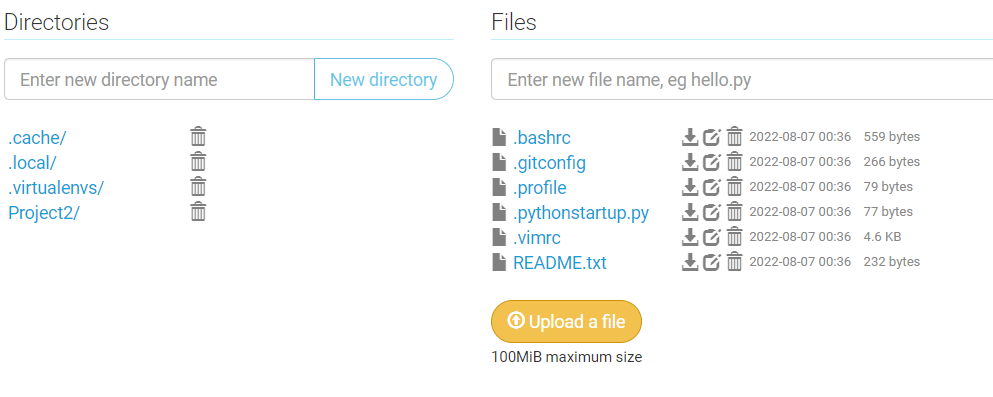

In [ ]:
from IPython.display import Image

Image(filename=google_file_prefix + 'Images/image1.png', width=700) 

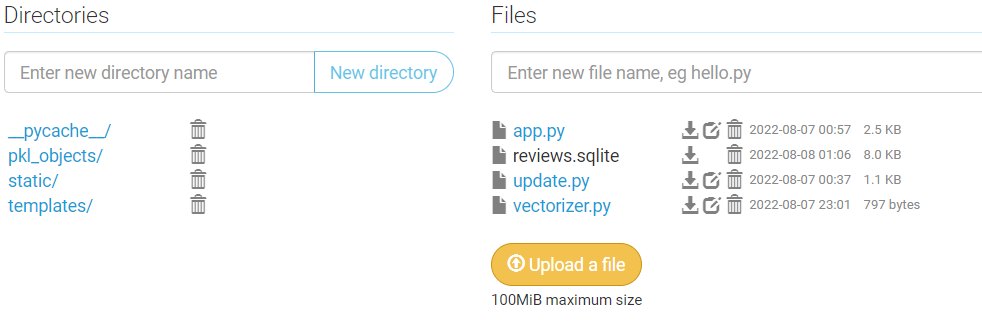

In [ ]:
Image(filename=google_file_prefix + 'Images/image2.png', width=700)

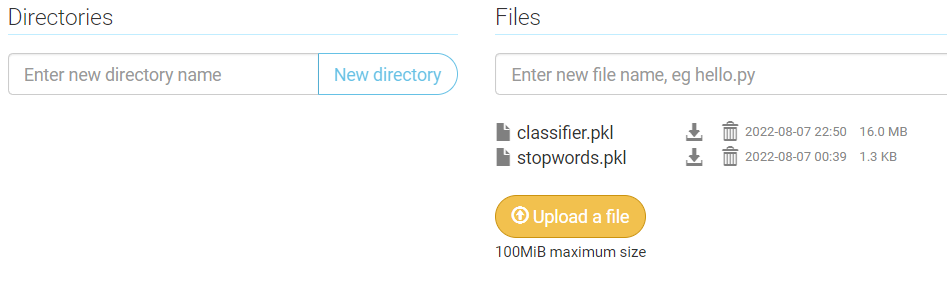

In [ ]:
Image(filename=google_file_prefix + 'Images/image3.png', width=700)

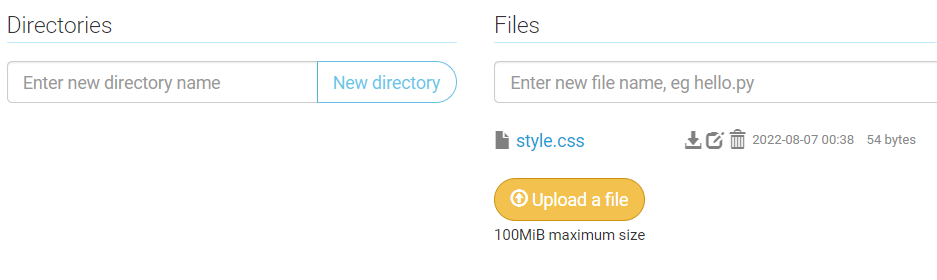

In [ ]:
Image(filename=google_file_prefix + 'Images/image4.png', width=700)

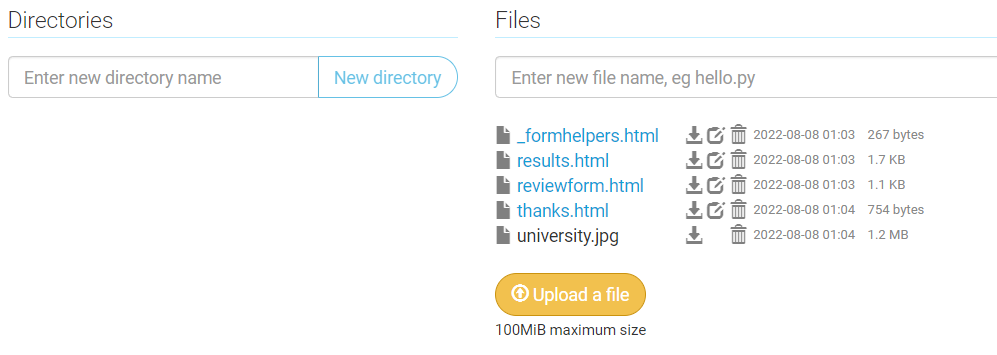

In [ ]:
Image(filename=google_file_prefix + 'Images/image5.png', width=700)

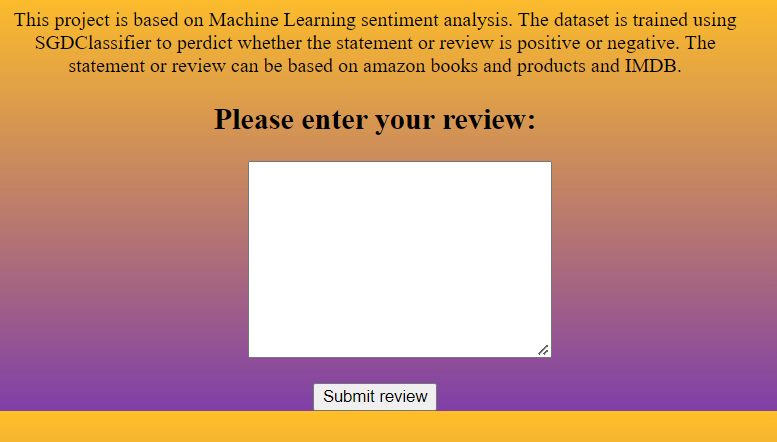

In [ ]:
Image(filename=google_file_prefix + 'Images/image6.png', width=700)

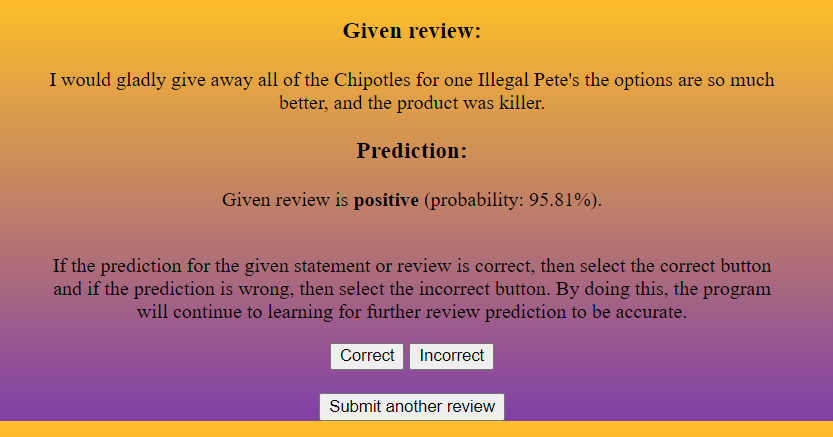

In [ ]:
Image(filename=google_file_prefix + 'Images/image7.png', width=700)